In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [2]:
image_path ="../outputvideo/cropped_img.jpg"
image=cv2.imread(image_path)
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

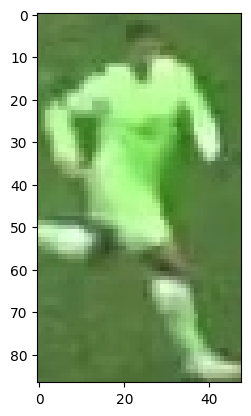

In [3]:
plt.imshow(image)
plt.show()

# take the top half

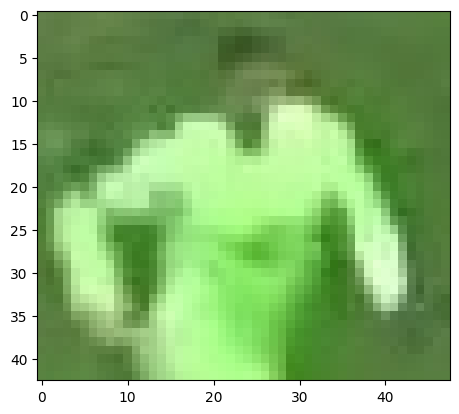

In [4]:
top_half_img = image[0:int(image.shape[0]/2), :]
plt.imshow(top_half_img)
plt.show()

# cluster the image

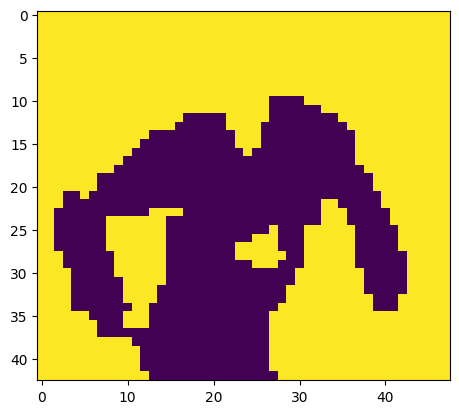

In [5]:
# reshape into 2d
image_2d= top_half_img.reshape(-1,3)

# k-mean clustering with 2 clusters
kmeans= KMeans(n_clusters=2,random_state=0)

kmeans.fit(image_2d)

# get cluster label
labels = kmeans.labels_

# reshape the label into the image shape

clustered_image = labels.reshape(top_half_img.shape[0],top_half_img.shape[1])

plt.imshow(clustered_image)
plt.show()

In [6]:
corner_clusters = [clustered_image[0, 0],clustered_image[0,-1],clustered_image[-1, 0],clustered_image[-1,-1]]
# -1 is size, the lib will guess it for us
non_player_cluster = max(set(corner_clusters), key = corner_clusters.count)
print(non_player_cluster)

1


In [7]:
player_cluster = non_player_cluster ^ 1
print(player_cluster)

0


In [8]:
kmeans.cluster_centers_[player_cluster]

array([171.52380952, 235.9047619 , 143.33197279])